<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/informe6_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de selección

**Entrada**: Conjunto de $n$ números diferentes $A$  más un índice $k$.

**Salida**: Elemento $x\in A$, que es mayor a exactamente $k-1$ elementos de $A$.

El elemento $x$ se conoce como **estadístico de orden $k$-ésimo** para el conjunto $A$.

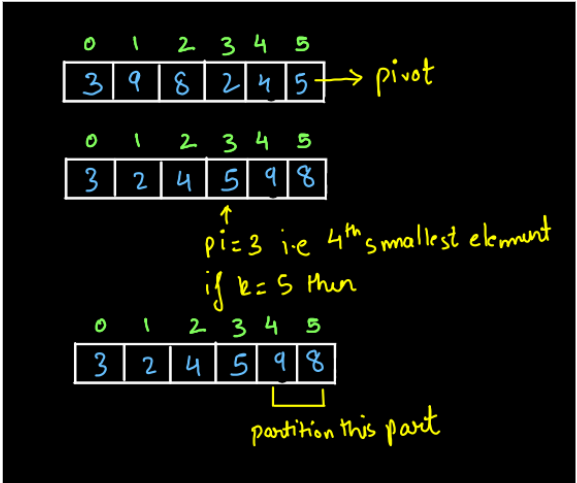

En este informe se aborda la teoría de reducción de problemas, la cual plantea que si podemos reducir un problema A a un problema B, se puede resolver "fácilmente" si el algoritmo para el problema B puede ser modificado para que resuelva A. Esto se refleja en el algoritmo **Select**, el cual ocupa una variación del *Partition* de **QuickSort** para dividir el arreglo original entregado. 

Para lograr esto necesitamos entender el concepto de un estadístico de orden. 
Se plantea que el estadístico de orden kº es igual al k-ésimo valor más pequeño de una muestra estadística. Junto con los estadísticos de rango, los estadísticos de orden son una de las herramientas fundamentales de la estadística no paramétrica y de inferencia. Las herramientas importantes de los estadísticos de orden son el mínimo, el máximo y la mediana, las cuales están estrechamente enlazadas con el proceso que realizan los algoritmos de selección, entre ellos **Select**. 

# 2. Selection

## 2.1 Código

In [10]:
def insertionSort(arr, cont):
 
  for i in range(1, len(arr)):

    key = arr[i]
    j = i-1
    cont[0] += 1
    while j >=0 and key < arr[j] :
      arr[j+1] = arr[j]
      j -= 1
      cont[0] += 1
    arr[j+1] = key
  return arr


# Función que particiona el arreglo a partir del pivote
def partition(arr, pivot, cont):
  i = 1
  cont[0] += 1
  if pivot !=0:
    arr[0],arr[pivot] = arr[pivot],arr[0]
  cont[0] += 1
  for j in range(1,len(arr)):
    cont[0] += 1
    if arr[j] < arr[0]:
        arr[j],arr[i] = arr[i],arr[j]
        i += 1

  arr[0],arr[i-1] = arr[i-1],arr[0]
  return i-1

# Se selecciona el pivote (mediana de medianas)     
def pivotSelection(arr, cont, verbose = False):
  # Si solo existen 5 elementos obtenemos la mediana de estos.
  cont[0] += 1
  if len(arr)<=5:
    sortArr = insertionSort(arr, cont)
    if (verbose == True):
      print("El arreglo tiene un tamaño menor o igual a 5, por lo que se retorna su mediana:", sortArr[len(sortArr)//2])
      print("\n")
    return sortArr[len(sortArr)//2]

  # Dividimos el arreglo en 5 partes.
  divisiones = [arr[i:(i+5)] for i in range(0,len(arr),5)]
  if (verbose == True):
    print ("Divisiones de n/5:", divisiones)

  # Ordenamos las particiones
  divisionesOrdenadas = [insertionSort(i, cont) for i in divisiones]
  if (verbose == True):
    print ("Divisiones de n/5 Ordenadas:", divisiones)

  # Obtenemos la mediana de cada partición y lo guardamos en un arreglo
  medianasDivisiones = [i[len(i)//2] for i in divisionesOrdenadas]
  if (verbose == True):
    print ("Medianas de Medianas:", medianasDivisiones)
    print("\n")

  # La mediana de medianas se obtiene llamando recursivamente a la función
  medianaDeMedianas = pivotSelection(medianasDivisiones, cont)
  
  return medianaDeMedianas

def select(arr, k, cont, verbose = False):

  cont[0] += 1
  # Si el largo del arreglo es 1 se retorna el elemento.
  if (len(arr) == 1):
    if (verbose == True):
      print("El largo del arreglo es 1, por lo que se retorna el elemento", arr[0])
      print("\n")
    return arr[0]

  # Se obtiene la mediana de medianas
  medianaPivote = pivotSelection(arr, cont, verbose)
  if (verbose == True):
    print("El pivote obtenido es:", medianaPivote)

  # Se obtiene el indice del pivote (Asumiendo que no hay números repetidos)
  medianaPivote = arr.index(medianaPivote)

  # Se divide el arreglo
  q = partition(arr, medianaPivote, cont)

  cont[0] += 1
  # Si son iguales se retorna el elemento
  if (q == k):
    if (verbose == True):
      print("q == k, asi que se retorna el k-ésimo menor elemento:", arr[q])
      print("\n")
    return arr[q]

  cont[0] += 1
  # Tomamos la division izquierda
  if (k < q):
    if (verbose == True):
      print("q < k, asi que nos quedamos con la parte izquierda:", arr[:q])
      print("\n")
    return select(arr[:q], k, cont, verbose)
  
  cont[0] += 1
  # Tomamos la division derecha
  if (k > q):
    if (verbose == True):
      print("q > k, asi que nos quedamos con la parte derecha:", arr[q + 1:])
      print("\n")
    return select(arr[q+1:], k-q-1, cont, verbose)

# Ejemplo
arr = [10, 4, 5, 8, 6, 11, 26]
cont = [0]
k = 3
print("El meenor elemento k-ésimo es", select(arr, k, cont, verbose = False))
print("Total de comparaciones:", cont[0])

El meenor elemento k-ésimo es 8
Total de comparaciones: 75


## 2.2 Descripción del algoritmo

El algoritmo **Select** se puede dividir en dos funciones fundamentales:

### Pivot-Selection

Esta función se encarga de encontrar el pivote utilizado *Partition*.

1. Divide el arreglo de $n$ elementos en $[n/5]$ grupos de 5 elementos cada uno (el último grupo queda con menos elementos).

2. Encuentra la **mediana** de cada grupo después de aplicar el algoritmo **InsertionSort** para ordenarlos.

3. Se aplica **Pivot-selection** recursivamente para encontrar la mediana del subarreglo de medianas, y esta será el pivote utilizado por **Partition**. 

### Select

Esta función lleva a cabo un trabajo similar al algoritmo *QuickSort*, el cual divide el arreglo en 2 partes, pero *Select* solamente se queda con una de las dos mitades en cada selección, aquella que contenga el $i$-ésimo menor elemento.

1. Comprueba que el elemento i-ésimo pueda estar dentro del arreglo.

2. Obtiene el pivote $k$ a través de la función **Pivot-Selection**

3. Si $i == k$ se retorna el elemento i-ésimo, si no lo son se elige una de las dos particiones:

* Si $i$ es menor que $k$ nos quedamos con el subarreglo izquierdo y se llama a **Select** de manera recursiva.

* Si $i$ es mayor que $k$ nos quedamos con el subarreglo derecho y se llama a **Select** de manera recursiva.

## 2.3 Ejemplo


En la imagen se observa un ejemplo del algoritmo **Select** aplicado al arreglo $A=[3,2,9,0,7,5,4,8,6,1]$. Se pide encontrar el mínimo elemento del arreglo. 

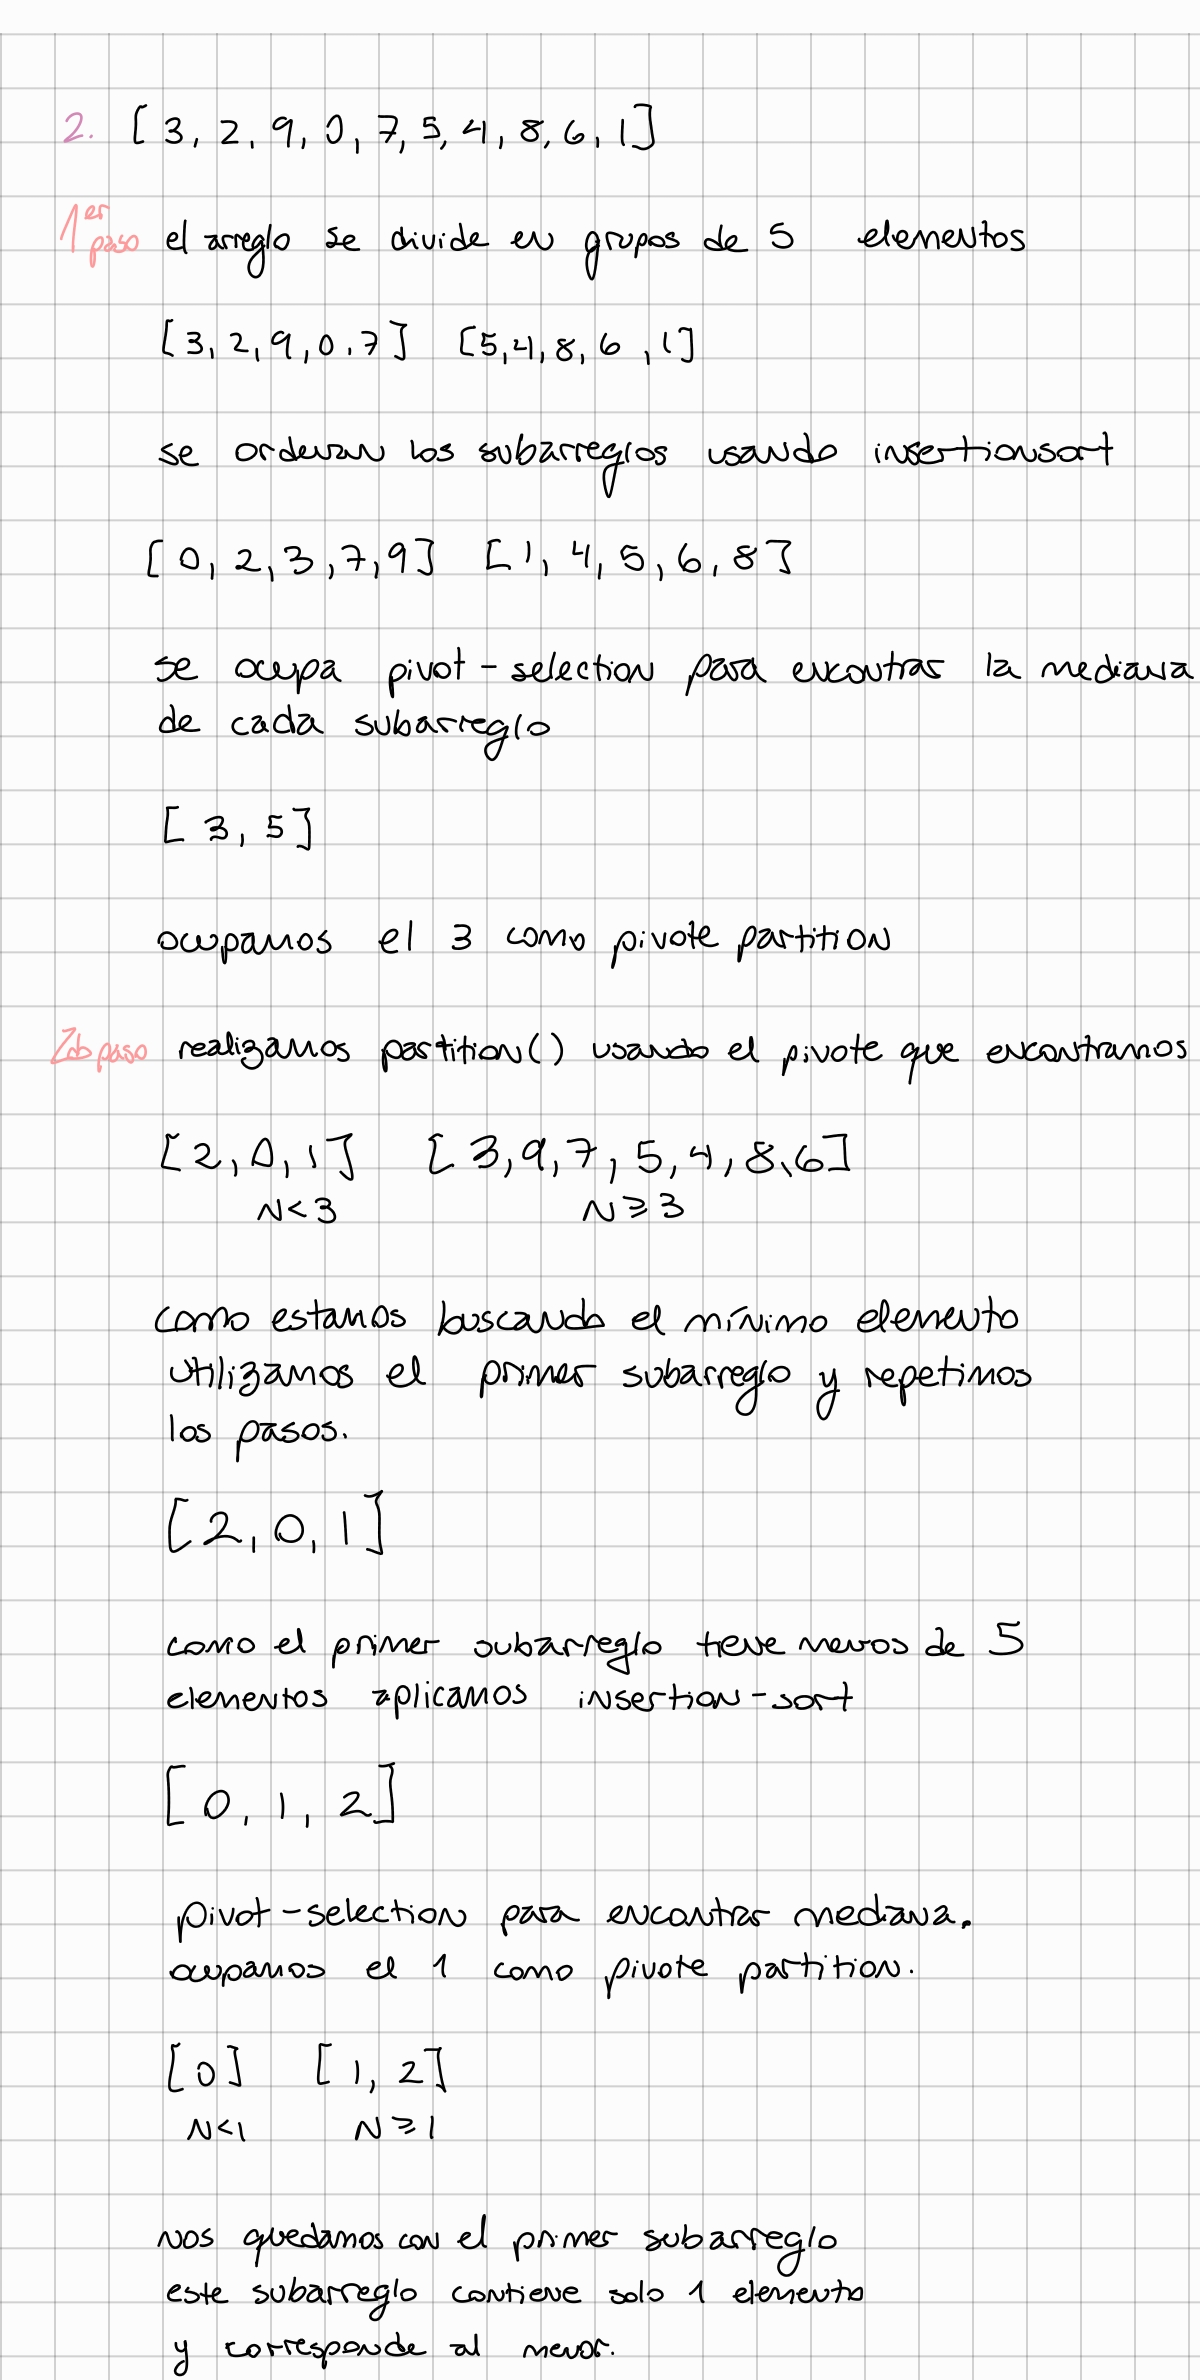

## 2.4. Ejecución del algoritmo paso a paso $verbose = True$

In [17]:
arr = [3,7,2,5,9,8,1,4,6]
k = 3
cont = [0]
print("El k-ésimo menor elementos es:", select(arr, k, cont, verbose = True))
print("Arreglo de entrada ordenado(para comprobar que funciona correctamente):", insertionSort(arr, cont))

Divisiones de n/5: [[3, 7, 2, 5, 9], [8, 1, 4, 6]]
Divisiones de n/5 Ordenadas: [[2, 3, 5, 7, 9], [1, 4, 6, 8]]
Medianas de Medianas: [5, 6]


El pivote obtenido es: 6
q < k, asi que nos quedamos con la parte izquierda: [3, 2, 5, 1, 4]


El arreglo tiene un tamaño menor o igual a 5, por lo que se retorna su mediana: 3


El pivote obtenido es: 3
q > k, asi que nos quedamos con la parte derecha: [4, 5]


El arreglo tiene un tamaño menor o igual a 5, por lo que se retorna su mediana: 5


El pivote obtenido es: 5
q < k, asi que nos quedamos con la parte izquierda: [4]


El largo del arreglo es 1, por lo que se retorna el elemento 4


El k-ésimo menor elementos es: 4
Arreglo de entrada ordenado(para comprobar que funciona correctamente): [1, 2, 3, 4, 5, 6, 7, 8, 9]


# 3. Tiempo de ejecución


El algoritmo select se apoya en múltiples subrutinas tales como InsertionSort, Partition  y PivotSelection. 

El algoritmo InsertionSort es utilizado exclusivamente en subarreglos de a lo sumo 5 elementos. Se sabe que InsertionSort realiza $n^2$ comparaciones. Es posible concluir que se realizarán a lo más 25 comparaciones. Por lo que la subrutina InsertionSort está acotada por un valor constante, vale decir $O(1)$.

Para cada llamada al algoritmo Partition recorremos el arreglo de manera lineal. Por lo que su complejidad es $O(n)$.

Pivot Selection es una función recursiva. Se itera por los números del arreglo para añadirlos a los subarreglos. Esto tiene una complejidad lineal $O(n)$. Esta subrutina se puede encontrar en otras implementaciones como 
"chunked".

Posteriormente se obtiene recursivamente la mediana de medianas. Concretamente el arreglo de medianas posee $n/5$ elementos. Por lo que el tiempo de ejecución de la llamada recursiva será denotado como $T(n/5)$.

Una vez realizada la partición, en el peor caso se presentan dos posibles tiempos. El primero es la recursión a la partición izquierda, cuyo tiempo sería $T(3n/10)$. El segundo es el de la recursión a la partición derecha y el que será utilizado para analizar el tiempo de ejecución, el tiempo de esta mitad sería $T(7n/10)$.

De lo anterior se deduce que la función de recurrencia $T(n)$ para el algoritmo select está definida por

$$
T(n) \leq O(n) + T(n/5) + T(7n/10)
$$

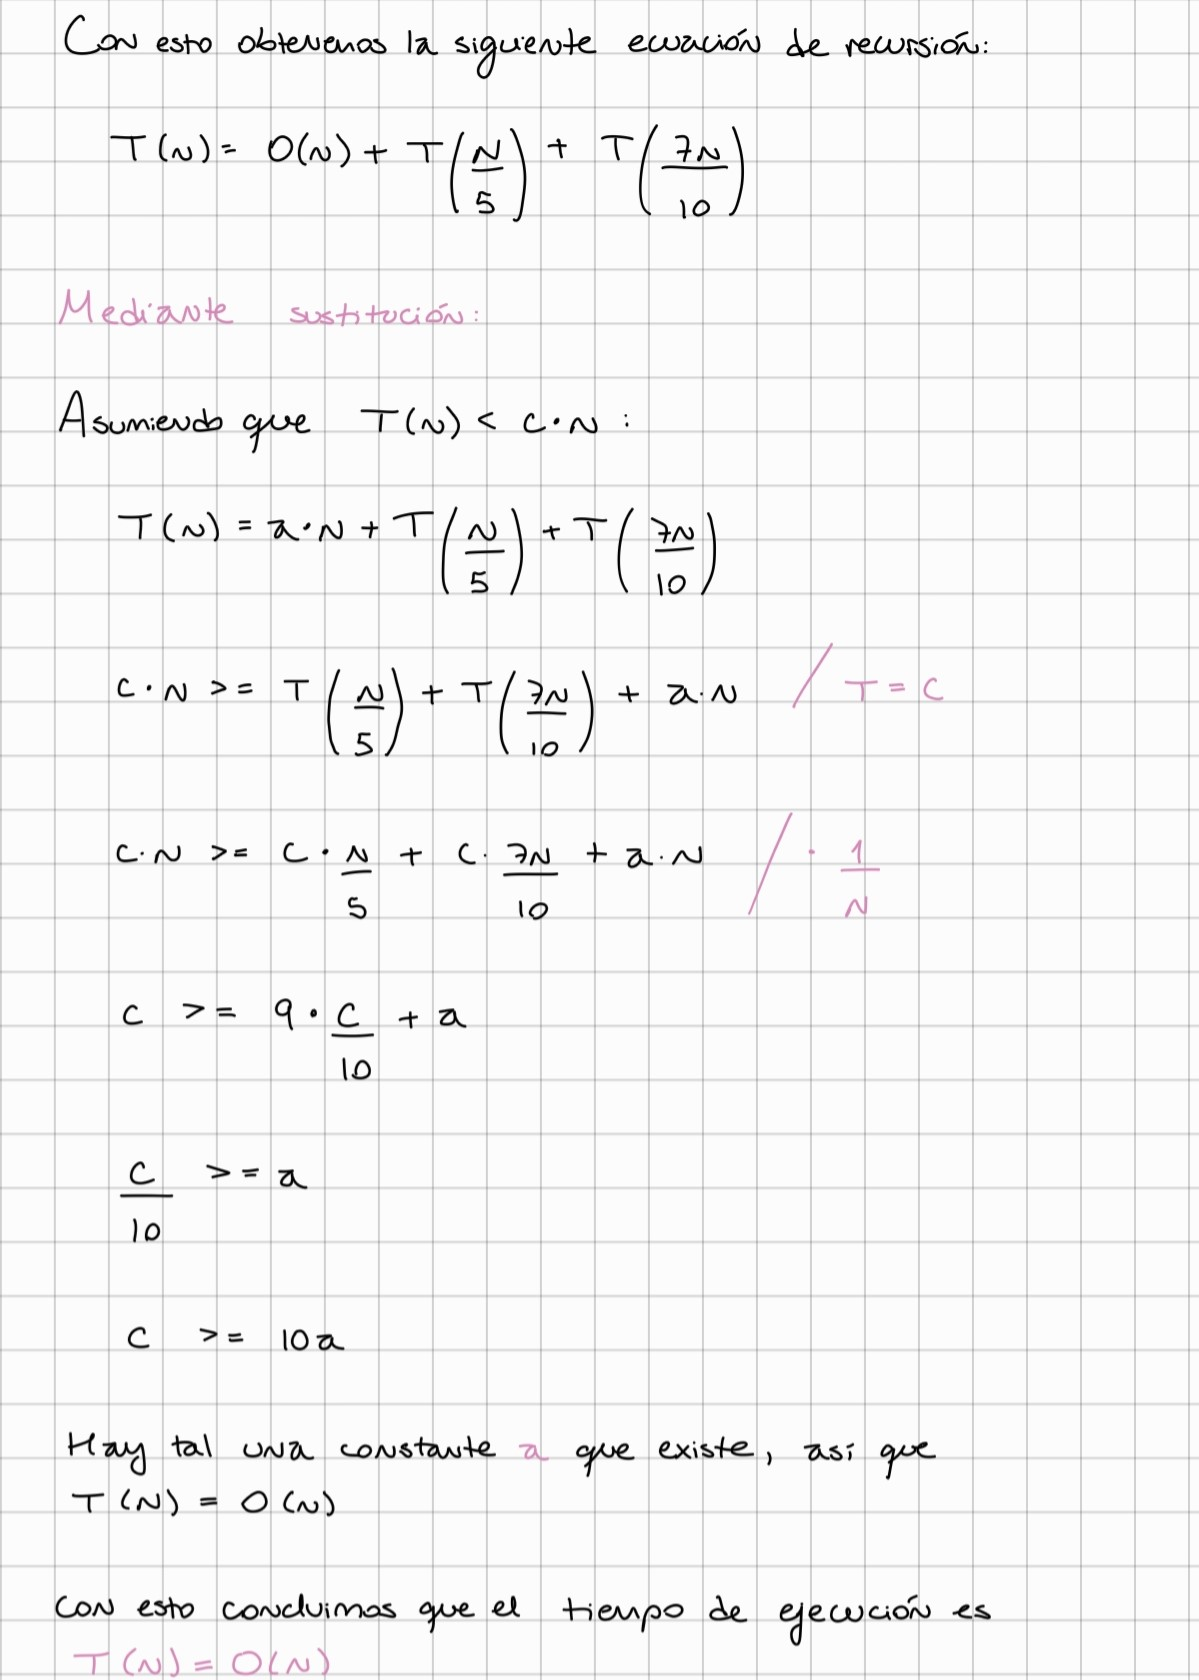

# 4. Correctitud


Para comprobar la correctitud del agoritmo **Select** utilizaremos la *inducción matemática*. 

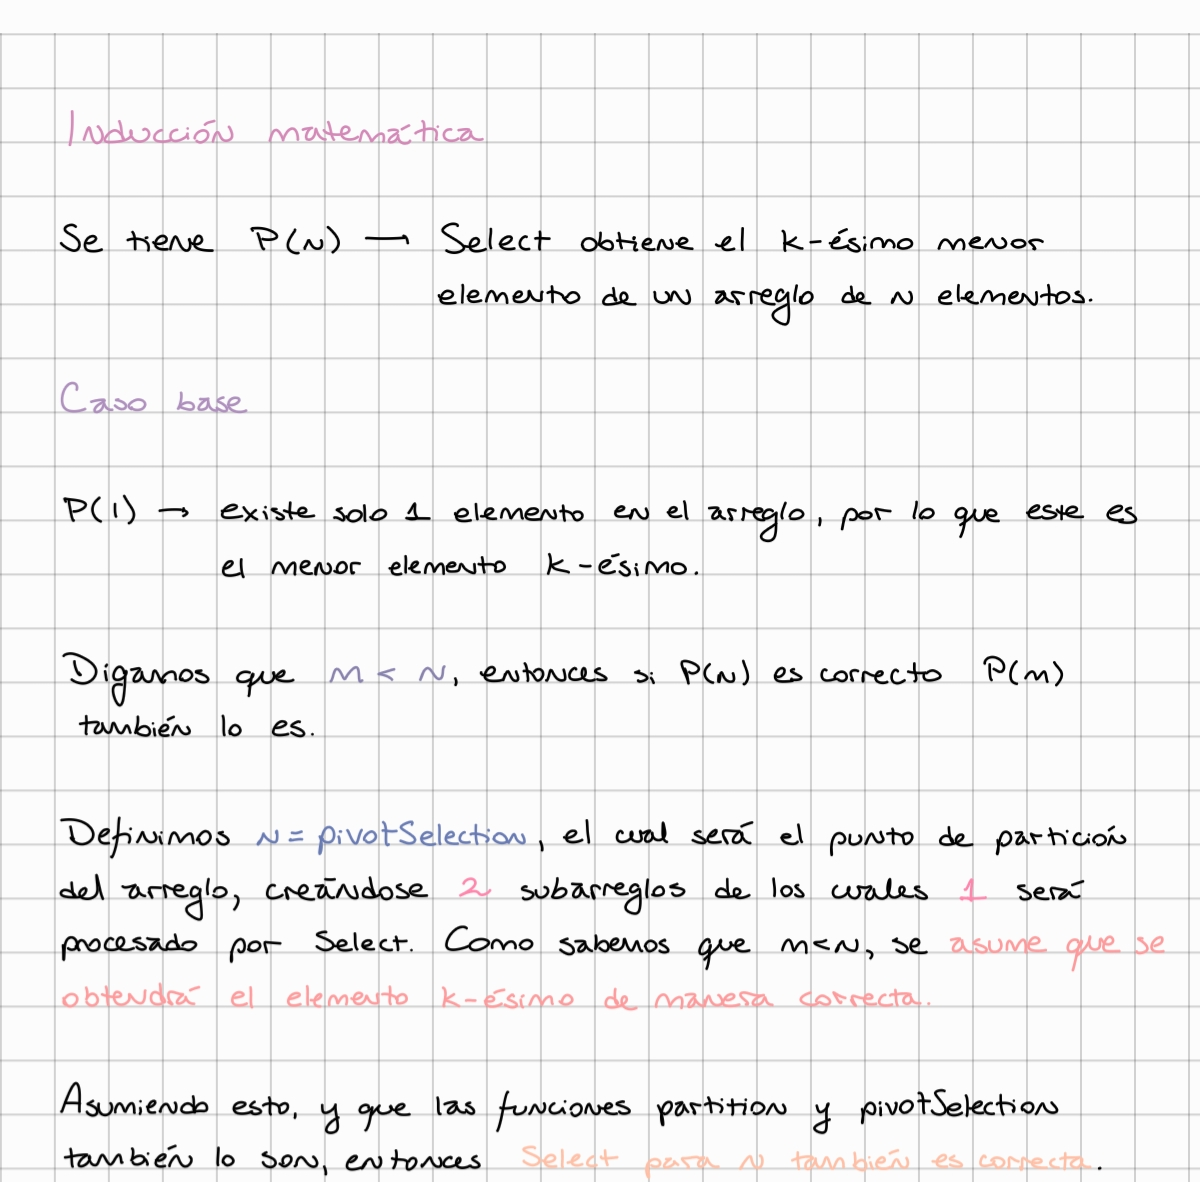

# 5. Experimentos

## 5.1. Cantidad de comparaciones realizadas en el mejor y peor caso teórico

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente, 
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,19]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

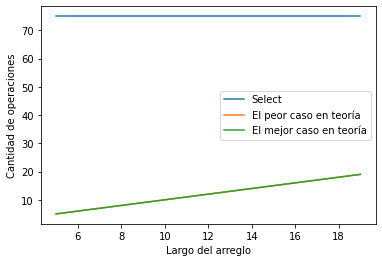

In [13]:
from itertools import count
import matplotlib.pyplot as plt 
from math import log2
import random

x=[n for n in range(5,20)] 
y1=[n for n in range(5,20)] # peor caso
y2=[n for n in range(5,20)] # mejor caso
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  cont = [0]
  k = 3
  select(arr, k, cont, verbose = False)
  y.append(cont[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Select", "El peor caso en teoría", "El mejor caso en teoría"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de operaciones')
plt.show()

### Análisis de resultados.

Como se ve en el gráfico, el mejor y el peor caso son lo mismo, lo cual se debe a que el tiempo de ejecución es el mismo para ambos casos $O(n)$, el cual se debe a la correcta elección del pivote. 

Si bien las comparaciones no se acercan a ninguno de los dos casos, siguen siendo lineales por lo que se respeta el tiempo de ejecución $O(n)$.

## 5.2 Select v/s Randomized-Select

A continuación se muestra un gráfico comparando los **tiempos de ejecución** de los algoritmos **Select** y **Randomized-Select** en función del tamaño del problema para arreglos generados de manera aleatoria de tamaño entre $5$ y $200$. 

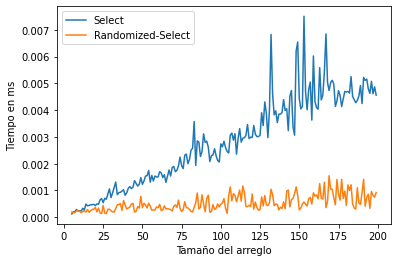

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import numpy as np

def Partition(a, p, r):
    x = a[r]
    i = p - 1
    for j in range(p, r):
        if a[j] <= x:
            i = i + 1
            
            a[i], a[j] = a[j], a[i]

    a[i+1], a[r] = a[r], a[i+1]

    return i + 1

def RandomizedPartition(a, p, r):
    i = np.random.randint(p, r)
    a[i], a[p] = a[p], a[i]
    return Partition(a, p, r)

def Randomizedselect(a, p, r, i):
    if p == r:
        return a[p]
    q = RandomizedPartition(a, p, r)
    
    k = q - p +1
    if i == k:
        return a[q]
    elif i < k:
        return Randomizedselect(a, p, q - 1, i)
    else:
        return Randomizedselect(a, q + 1, r, i - k)


x=[]; y=[]
y1=[]

for n in range(5,200):

  a = random.sample(range(1, 1000), n)
  cont = [0]
  verbose = False
  #la función repeat está ejecutando 20 veces Select con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import select", stmt=f"select({a},{3},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import Randomizedselect", stmt=f"Randomizedselect({a},{0},{n-1},{3})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Select", "Randomized-Select"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados.

Como se ve en el gráfico, hay una diferencia significativa en el tiempo de ejecución de ambos algoritmos, siendo Randomized-select más eficiente que Select. Se puede ver como el primer algoritmo llega máximo a los 0,001ms mientras que el segundo mencionado llega a los 0,007 ms. Esta diferencia se puede justificar con que Randomized-select selecciona un elemento aleatorio como pivote y particiona alrededor de él, mientras que Select tiene que dividir el arreglo en subarreglos de tamaño n/5, sacar la mediana de cada subarreglo, juntarlas en un arreglo y calcular la mediana de medianas, con lo que recién puede ocupar ese elemento como pivote para hacer partition alrededor de él, lo cual le permite obtener un pivote mas acertado, pero a un mayor costo como se puede ver en su tiempo de ejecución.

Además, otra razón por la que Select es menos eficiente es que los subarreglos que crea para sacar sus medianas no pueden contener más de 5 elementos, por lo cual para arreglos de gran tamaño debe subdividir el arreglo original en muchos subarreglos, característica que se puede apreciar en el gráfico realizado. Esto se puede ver como desde el tamaño 25 del arreglo el tiempo en ms del algortimo empieza a escalar de manera abrupta. 